In [13]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

- NCVS Series and Supplements, https://www.icpsr.umich.edu/web/NACJD/series/95
- Annual Survey of Jails 2020, https://www.icpsr.umich.edu/web/NACJD/studies/38408
- National Prisoner Statistics, https://www.icpsr.umich.edu/web/NACJD/studies/38249
- American Community Survey, https://www.census.gov/programs-surveys/acs/

In [14]:
proj_df=pd.read_csv('NCVS_2020.csv')
proj_df.shape

(8043, 81)

In [15]:
proj_df.sample(10)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
4806,2020.3,1.809810e+24,6,25,1,1,2,1,2,2,...,1,2,2,9,99,9,9,9,4,3
3812,2020.2,1.865780e+24,12,65,2,1,1,9,2,2,...,8,1,9,9,98,8,8,8,4,3
1831,2020.1,1.894440e+24,2,14,2,1,1,9,2,2,...,1,1,9,9,27,3,1,2,4,1
5451,2020.3,1.925730e+24,6,36,3,1,1,9,2,2,...,2,1,9,9,2,1,3,2,1,3
5707,2020.4,1.605110e+24,35,61,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,4,1
3833,2020.2,1.883040e+24,5,54,2,1,2,1,2,2,...,1,1,9,9,27,3,1,2,4,1
4779,2020.3,1.809390e+24,22,34,2,5,1,9,2,2,...,1,1,9,9,27,1,1,2,1,2
2598,2020.2,1.605930e+24,5,57,3,1,1,9,2,2,...,1,1,9,9,4,3,4,2,4,1
7321,2020.4,1.907770e+24,2,56,2,1,2,1,2,2,...,1,2,2,9,99,9,9,9,4,3
4354,2020.3,1.713710e+24,5,12,1,1,6,2,2,1,...,1,1,9,9,27,1,1,2,4,1


Your submission is to be uploaded to Canvas.  
There are some minimum requirements for your submission:

1. Upload your report in PDF format to Canvas. 
2. Upload the Jupyter notebook containing your analysis code to Canvas.
3. The report should be 4 pages maximum, including bibliography, tables and figures.
4. If your report uses outside results and/or data, proper citations must be provided.
    


**ABOUT THE DATASET**

In [16]:
len(np.unique(proj_df))

1925

**CHARACTERISTICS OF THE DATASET**

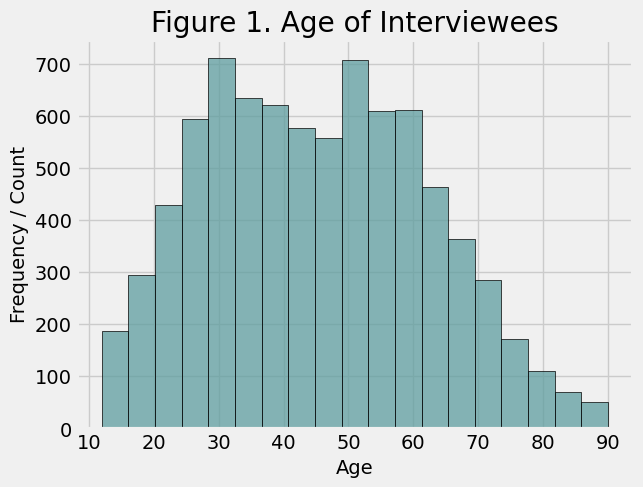

In [17]:
import seaborn as sns

sns.histplot(proj_df.AGE, bins=19, kde=False, color='cadetblue', edgecolor='black')

plt.title("Figure 1. Age of Interviewees")
plt.xlabel("Age")
plt.ylabel("Frequency / Count")
plt.show()

In [18]:
proj_df['AGE'].mean()

45.24841477060798

In [19]:
proj_df['AGE'].median()

44.0

In [20]:
np.std(proj_df.AGE)

16.951231021899783

([<matplotlib.axis.XTick at 0x7ff4615b6d10>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

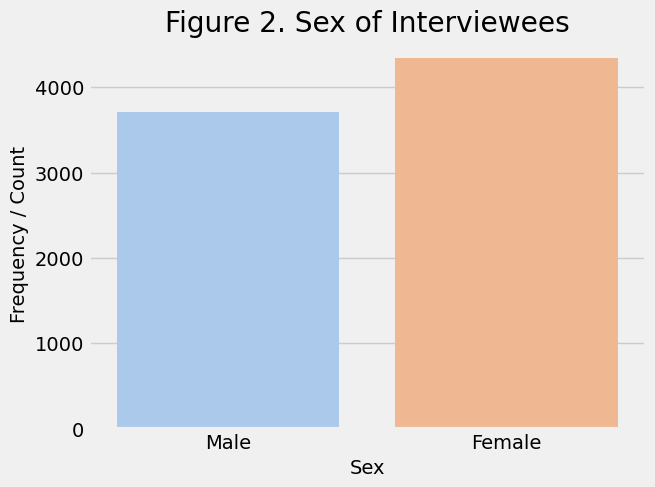

In [21]:
sns.countplot(x="SEX", data=proj_df, palette='pastel')
plt.title("Figure 2. Sex of Interviewees")
plt.xlabel("Sex")
plt.ylabel("Frequency / Count")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

In [22]:
sex_counts = proj_df['SEX'].value_counts()

sex_counts_df = pd.DataFrame({'Count': sex_counts.values}, index=['Female', 'Male'])

sex_counts_df

,Count
Female,4338
Male,3705


In [23]:
femalespercent = 4339 / (4338 + 3705)
malespercent = 3705 / (4338 + 3705)
print(femalespercent)
print(malespercent)

0.5394753201541713
0.4606490115628497


([<matplotlib.axis.XTick at 0x7ff46162cd30>,
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separ.'),
  Text(4, 0, 'Never'),
  Text(5, 0, 'Residue')])

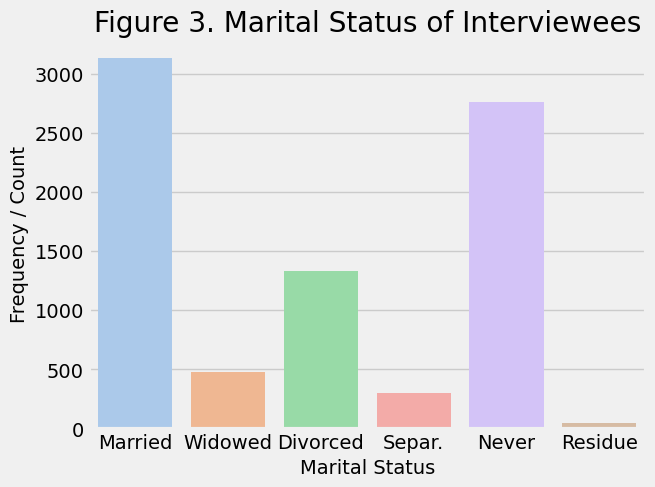

In [24]:
names = ['Married', 'Widowed', 'Divorced', 'Separ.', 'Never', 'Residue']
sns.countplot(x="MARITAL", data=proj_df, palette='pastel')
plt.title("Figure 3. Marital Status of Interviewees")
plt.xlabel("Marital Status")
plt.ylabel("Frequency / Count")
plt.xticks(ticks=range(len(names)), labels=names)

In [25]:
marital_counts = proj_df['MARITAL'].value_counts()

marital_counts_df = pd.DataFrame({'Count': marital_counts.values, 'Marital Status': marital_counts.index})

marital_counts_df['Status Title'] = ['Married', 'Never Married', 'Divorced', 'Widowed', 'Seperated', 'Residue']
proportions = marital_counts.values / len(proj_df)
marital_counts_df['Proportions'] = proportions
marital_counts_df

,Count,Marital Status,Status Title,Proportions
0,3131,1,Married,0.389283
1,2760,5,Never Married,0.343156
2,1333,3,Divorced,0.165734
3,475,2,Widowed,0.059058
4,301,4,Seperated,0.037424
5,43,8,Residue,0.005346


**Part C Code**

Text(0.5, 1.0, 'Figure 4. Proportion of Incidents vs Household Income Level')

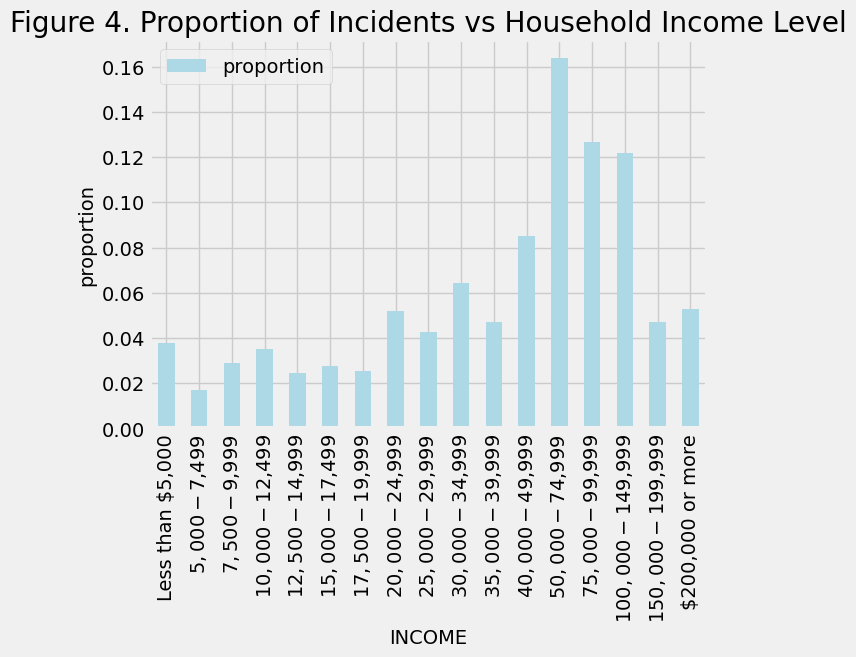

In [26]:
# INCOME x NUM_INCIDENTS
new_df = proj_df.drop_duplicates(subset = ["IDHH"])
incidentdata = new_df.pivot_table("NUM_INCIDENTS", index = "INCOME", aggfunc = np.sum).reset_index()
incidentdata
sum_incidents = new_df["NUM_INCIDENTS"].sum()
sum_incidents

incidentdata = incidentdata.assign(proportion = incidentdata["NUM_INCIDENTS"]/sum_incidents)
income_list = ["Less than $5,000", "$5,000-$7,499", "$7,500-$9,999", "$10,000-$12,499", "$12,500-$14,999", "$15,000-$17,499", "$17,500-$19,999", "$20,000-$24,999", "$25,000-$29,999", "$30,000-$34,999", "$35,000-$39,999", "$40,000-$49,999", " $50,000-$74,999", "$75,000-$99,999", "$100,000-$149,999", "$150,000-$199,999", "$200,000 or more"]
incidentdata["INCOME"] = income_list

incidentdata.plot.bar(x = "INCOME", y = "proportion", color = "lightblue")
plt.ylabel("proportion")
plt.title("Figure 4. Proportion of Incidents vs Household Income Level")

In [27]:
incidentdata

,INCOME,NUM_INCIDENTS,proportion
0,"Less than $5,000",85,0.037913
1,"$5,000-$7,499",38,0.016949
2,"$7,500-$9,999",65,0.028992
3,"$10,000-$12,499",79,0.035236
4,"$12,500-$14,999",55,0.024532
5,"$15,000-$17,499",62,0.027654
6,"$17,500-$19,999",57,0.025424
7,"$20,000-$24,999",116,0.051740
8,"$25,000-$29,999",96,0.042819
9,"$30,000-$34,999",144,0.064228


Text(0.5, 1.0, 'Figure 5. Proportion of Reports vs Sex')

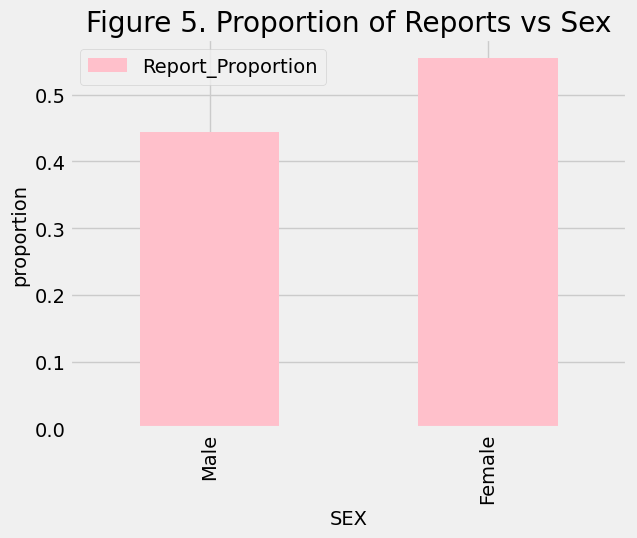

In [28]:
# NUM_REPORT x SEX

new_df = proj_df.drop_duplicates(subset = ["IDHH"])
reportdata = new_df.pivot_table("NUM_REPORT", index = "SEX", aggfunc = np.sum).reset_index()
sum_reports = new_df["NUM_REPORT"].sum()

reportdata = reportdata.assign(Report_Proportion = reportdata["NUM_REPORT"]/sum_reports)
sex_list = ["Male", "Female"]
reportdata["SEX"] = sex_list

reportdata.plot.bar(x = "SEX", y = "Report_Proportion", color = "pink")
plt.ylabel("proportion")
plt.title("Figure 5. Proportion of Reports vs Sex")

In [29]:
reportdata

,SEX,NUM_REPORT,Report_Proportion
0,Male,1017,0.444687
1,Female,1270,0.555313
